In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from itertools import cycle

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# 1. Load and prepare data
df = pd.read_csv('../Preprocessing/balanced_ecg_data.csv')  # Your balanced dataset
print("Dataset Head:\n", df.head())

Dataset Head:
    Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0 -1.944044  1.891310  5.378017 -1.099764  0.319998 -0.107990  0.192998   
1  0.548890  3.689146 -1.079215 -1.125497  6.892610 -0.114086 -0.129833   
2  1.044743  2.804073 -1.779122 -0.358211  6.132624 -1.309396 -0.731316   
3 -2.848743 -2.220174 -0.498797 -0.054547  0.073406  0.927517  1.891807   
4 -0.715628  0.217362  2.032461 -0.144826  4.375660 -1.762026  1.335940   

   Feature8  Feature9  Feature10  ...  Feature21  Feature22  Feature23  \
0 -0.531588 -1.978358   0.505306  ...   0.435838  -0.375777  -2.410484   
1 -4.471123  1.281707   2.509007  ...  -0.515136  -1.814937  -0.659753   
2 -3.381683 -1.444734   3.028355  ...  -0.928873  -1.592203  -0.389953   
3 -0.381548  0.017551   0.659493  ...   0.662054   0.671306  -0.463003   
4  1.742721 -1.771379   0.819612  ...  -0.428352  -0.511074  -0.346423   

   Feature24  Feature25  Feature26  Feature27  Feature28  Feature29  target  
0   1.30730

In [4]:
df['target'].value_counts()

target
8     367
3     367
13    367
2     367
4     367
5     367
14    367
6     367
10    367
1     367
11    367
7     367
0     367
12    367
9     367
Name: count, dtype: int64

In [5]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

In [6]:
# 2. Split data (stratified for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y  # Preserve class distribution
)

In [7]:
# 3. Feature scaling (essential for K-means)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# 4. Initialize and train KMeans Clustering model
kmeans = KMeans(
    n_clusters=15,        # 15 clusters (assuming 15 classes)
    init='k-means++',     # Smart centroid initialization
    max_iter=300,         # Ensures convergence
    random_state=42,      # Reproducibility
    n_init=10             # Number of times k-means runs with different centroid seeds
)   

In [9]:
# Fit K-means on training data and predict clusters on test data
kmeans.fit(X_train_scaled)
y_pred_train = kmeans.predict(X_train_scaled)
y_pred_test = kmeans.predict(X_test_scaled)

In [10]:
# 5. Map K-means cluster labels to actual class labels
# Since K-means assigns arbitrary cluster labels, we need to map them to true labels
#Using the most frequent true label in each cluster for mapping
def map_clusters_to_labels(y_true, y_cluster):
    y_true = pd.Series(y_true)  # Ensure y_true is a pandas Series
    mapping = {}
    for cluster in np.unique(y_cluster):  # Iterate only over existing clusters
        mask = (y_cluster == cluster)
        if mask.sum() > 0:  # Ensure cluster is not empty
            most_common = y_true[mask].mode().iloc[0]  # Handle multiple modes safely
            mapping[cluster] = most_common
    # Map cluster predictions to true labels
    y_mapped = np.array([mapping.get(cluster, -1) for cluster in y_cluster])
    return y_mapped

# Map clusters to true labels for test set
y_pred_mapped = map_clusters_to_labels(y_test, y_pred_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred_mapped)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 62.29%



Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      0.05      0.10       110
     Class 1       0.00      0.00      0.00       110
     Class 2       0.31      0.36      0.33       110
     Class 3       0.30      0.92      0.45       111
     Class 4       0.93      1.00      0.96       110
     Class 5       0.96      1.00      0.98       110
     Class 6       0.92      1.00      0.96       111
     Class 7       0.33      0.47      0.39       110
     Class 8       0.00      0.00      0.00       110
     Class 9       0.53      0.93      0.67       110
    Class 10       0.83      1.00      0.91       110
    Class 11       0.72      1.00      0.84       110
    Class 12       1.00      1.00      1.00       110
    Class 13       0.96      0.60      0.74       110
    Class 14       0.00      0.00      0.00       110

    accuracy                           0.62      1652
   macro avg       0.58      0.62      0.56      1652
w

c:\Users\rajit\anaconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rajit\anaconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rajit\anaconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


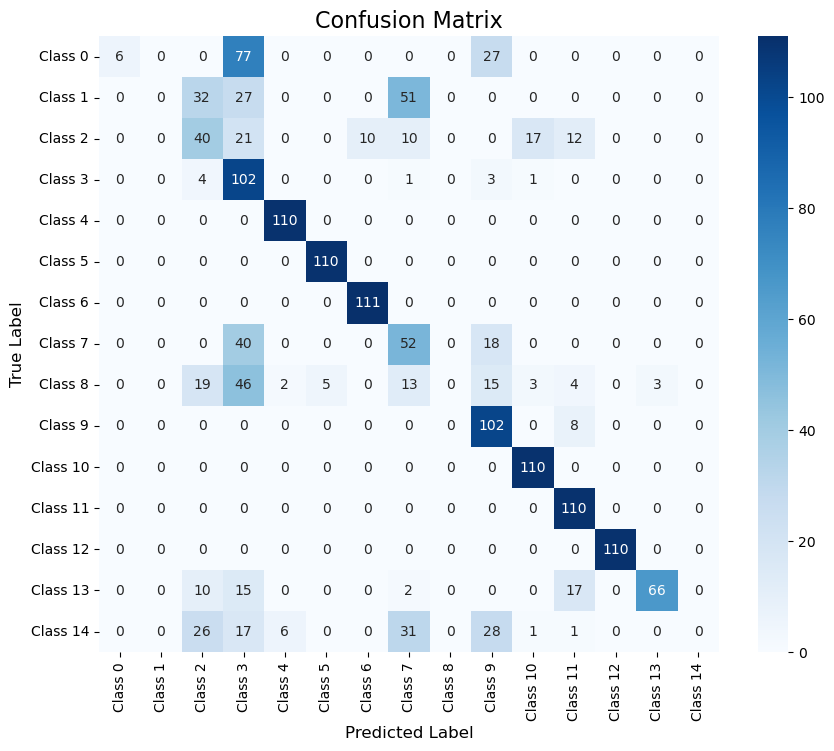

In [22]:
# 6. Evaluation Metrics
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_mapped, target_names=[f"Class {i}" for i in range(15)]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mapped)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f"Class {i}" for i in range(15)],
            yticklabels=[f"Class {i}" for i in range(15)])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

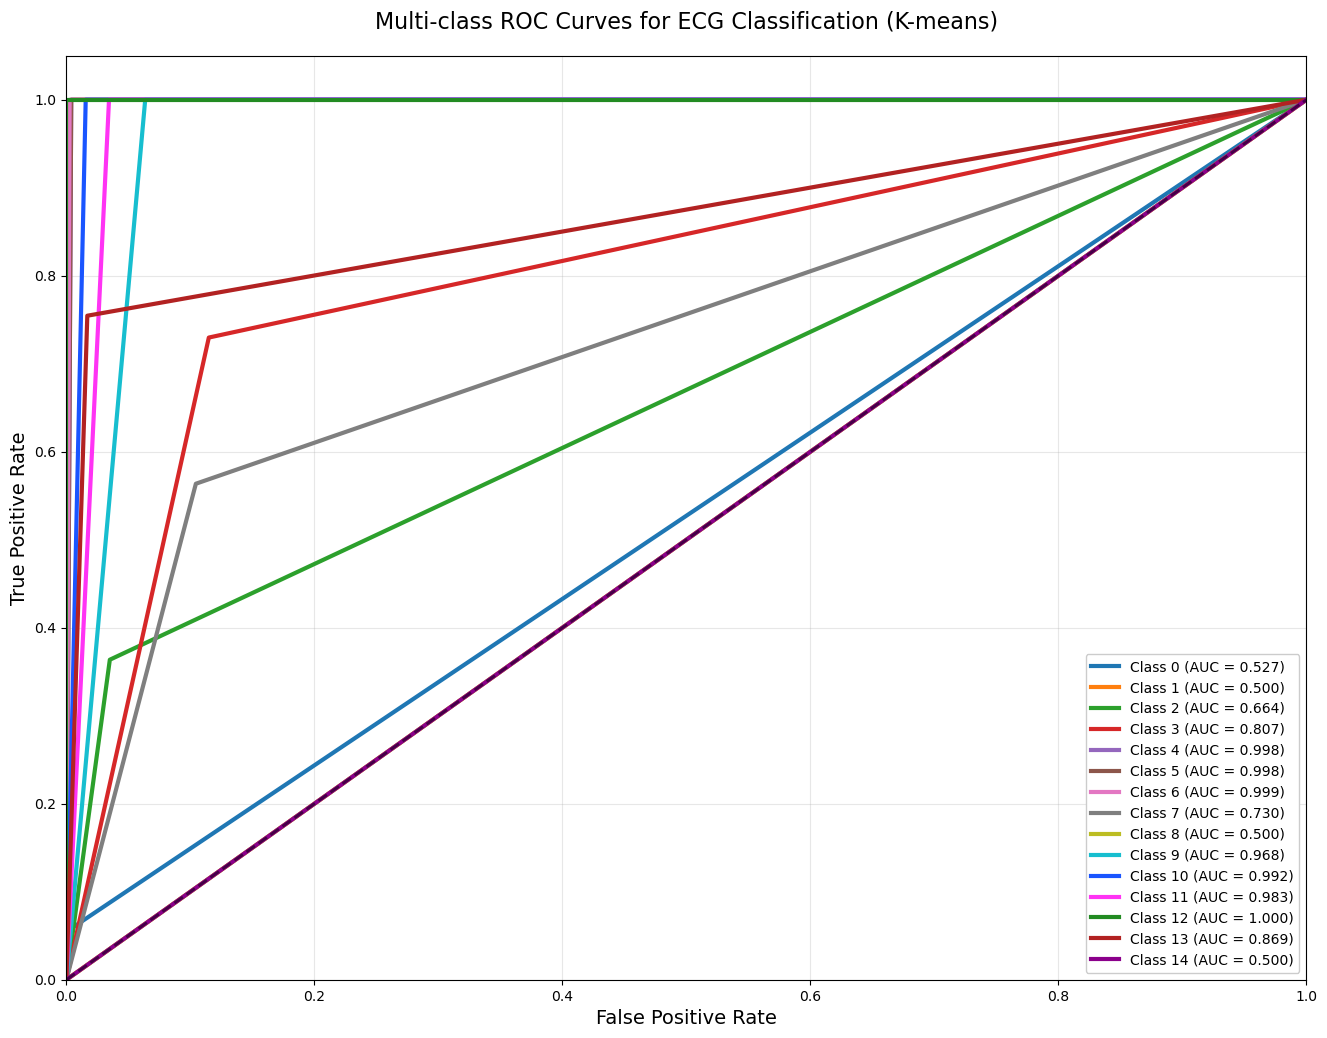

In [12]:
# 7. ROC Curves for All Classes
# Binarize the true and predicted labels for ROC calculation
y_test_bin = label_binarize(y_test, classes=range(15))
y_pred_bin = label_binarize(y_pred_mapped, classes=range(15))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(15):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(16, 12))
colors = cycle([
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#1a55FF', '#FF33F4', '#228B22', '#B22222', '#8B008B'
])

for i, color in zip(range(15), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=3,
             label=f'Class {i} (AUC = {roc_auc[i]:.3f})')

# Formatting
plt.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Multi-class ROC Curves for ECG Classification (K-means)', fontsize=16, pad=20)
plt.legend(loc='lower right', fontsize=10, framealpha=1)
plt.grid(alpha=0.3)
plt.show()